# Processamento digite de imagens

<h4>Primeiro deverá ser importado as bibliotecas que serão uteis</h4>
<p> O pyplot é usado para exibir imagens e criar gráficos e o skimage para fazer a leitura da imagem da mesma pasta do arquivo. </p>

In [1]:
from matplotlib import pyplot as plt

In [2]:
from skimage import io

## Niveis de cinza
O algoritmo abaixo faz o processamento para uma imagem RGB para escala de cinza, aplicando um valor constante para cada pixel em cada canal de cor e somando.

In [3]:
def escalaDeCinza(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b

    return gray

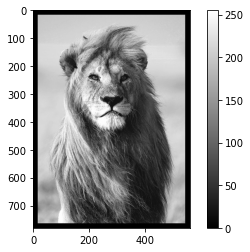

In [14]:
img = io.imread('gatinho.jpg')

plt.imshow(img, cmap='gray')
plt.colorbar()

## Inversão de cor
Para inverter as cores podemos apenas subtrair o valor do pixel atual de 255 (nível máximo de intensidade)

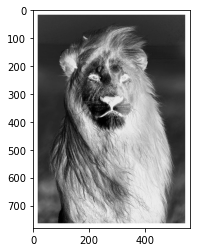

In [5]:
# Função inverte cores
row, col, color = img.shape

for i in range(row):
    for j in range(col):
        img[i, j] = 255 - img[i, j]
plt.imshow(img, cmap='gray')
row, col, color = img.shape


<blockquote> OBS: Sempre lembrar de resetar a imagem original antes de usar uma nova técnica. </blockquote>

## Histograma
Para gerar o histograma lemos todos os pixels e mapeamos em uma estrutura de dados dicionário para em seguida gerar o gráfico.

In [7]:
def gerar_histograma():
    histo = {}
    for i in range(256): # Inicializando o dict
        histo[i] = 0

    for i in range(row):
        for j in range(col):
            histo[img[i, j, 1]] = histo[img[i, j, 1]] + 1
    plt.bar(histo.keys(),histo.values())
    plt.show()

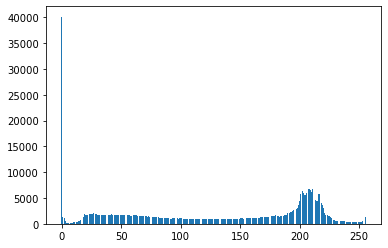

In [8]:
gerar_histograma()

## Logaritmica
Nessa função é aplicada a fórmula <code>(255 / log(1 + 255 / fator)) * log((1 + r) / fator)</code> para cada pixel e cada canal de cor com base no fator dado pelo usuário. No caso abaixo usamos o fator 5 na imagem do leão e o esperado é que ela deixe a foto mais clara

5


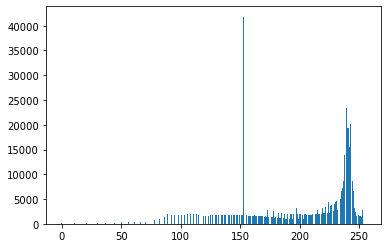

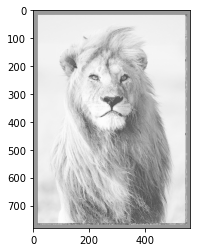

In [9]:
# Logaritmica
from math import log

fator = float(input())

for i in range(row):
    for j in range(col):
        r, g, b = img[i,j,0], img[i,j,1], img[i,j,2]
        
        img[i,j,0] = (255/log(1+255/fator))*log((1+r)/fator)
        img[i,j,1] = (255/log(1+255/fator))*log((1+g)/fator)
        img[i,j,2] = (255/log(1+255/fator))*log((1+b)/fator)
gerar_histograma()
plt.imshow(img, cmap='gray')

<blockquote>Podemos comparar o histograma acima com o da foto original e percebemos uma maior concentração nos pixels de intensidade alta. Concluímos que o algoritmo foi eficiente em fazer o desejado.</blockquote>

## Exponencial
Nessa função é aplicada a fórmula <code>(255 / exp(aux)) * (exp(r) - 1)</code>  onde aux é 255/fator fornecido pelo usuário e, para cada pixel e cada canal de cor com base no fator, que neste caso usamos 25. O esperado desse algoritmo é que ela deixe a foto mais escura

25


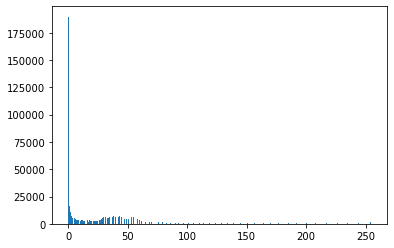

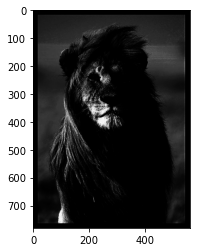

In [11]:
# Exponencial
from math import exp

fator = float(input())

for i in range(row):
    for j in range(col):
        aux = 255/fator
        r, g, b = img[i,j,0]/fator, img[i,j,1]/fator, img[i,j,2]/fator
        
        img[i,j,0] = (255/exp(aux))*(exp(r)-1)
        img[i,j,1] = (255/exp(aux))*(exp(g)-1)
        img[i,j,2] = (255/exp(aux))*(exp(b)-1)
gerar_histograma()
plt.imshow(img, cmap='gray')

<blockquote>Comparando com o histograma original percebe-se que esse concentra a maior parte dos seus pixels próximos a zero. Concluindo o que o algoritmo fez o esperado.  </blockquote>

# Equalizando
Processo para tentar deixar os pixels todos de forma igualmente distribuídos fazendo uma probabilidade cumulativa e usando como parâmetro para o novo valor de cada pixel da imagem.

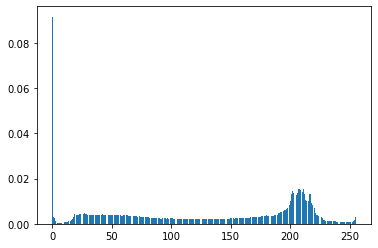

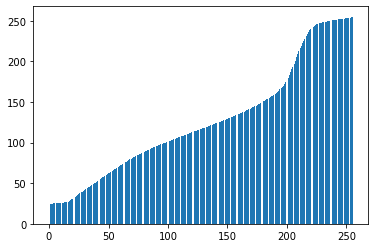

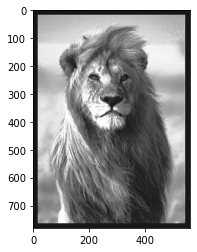

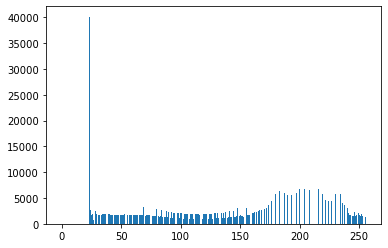

In [13]:
# Equalizar
def equalizar():
    histo = {}
    for i in range(256): 
        histo[i] = 0

    # Criando o histograma
    for i in range(row):
        for j in range(col):
            histo[img[i, j, 1]] = histo[img[i, j, 1]] + 1
            
    totPixels = img.shape[0]*img.shape[1]
    histoProb = {}
    
    # Criando o histograma probabilistico
    for i in range(0, 256):
        histoProb[i] = histo[i] / totPixels
        
    plt.bar(histoProb.keys(), histoProb.values())
    plt.show()
    
    # Probabilidade acumulativa
    acc = {}
    sumProb = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sumProb += histoProb[i-1]
        acc[i] = 255*(histoProb[i] + sumProb)
        
    plt.bar(acc.keys(), acc.values())
    plt.show()
    
    # Equalizando
    for i in range(row):
        for j in range(col):
            img[i, j, 0] = acc[img[i, j, 0]]
            img[i, j, 1] = acc[img[i, j, 1]]
            img[i, j, 2] = acc[img[i, j, 2]]
    plt.imshow(img)
    plt.show()
    gerar_histograma()
equalizar()

<blockquote>Comparando o primeiro histograma com o último e percebemos que nesse caso o algoritmo fez um espaçamento dos pixels, deixando um pouco mais escuro o plano de fundo do leão que antes tendiam mais para intensidades mais fortes.</blockquote> 

# Especificar
Essa técnica consiste em atribuir manualmente um histograma para uma imagem específica.  Primeiro vamos usar o histograma de outra imagem para atribuir ao histograma do leão

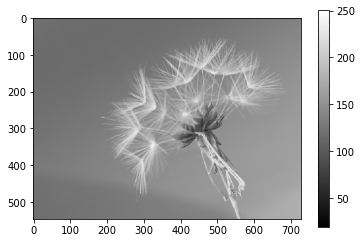

In [15]:
img2 = io.imread('leao.jpg')

plt.imshow(img2, cmap='gray')
plt.colorbar()
row2, col2, color2 = img2.shape

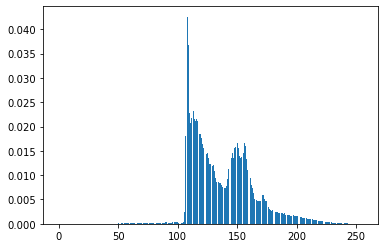

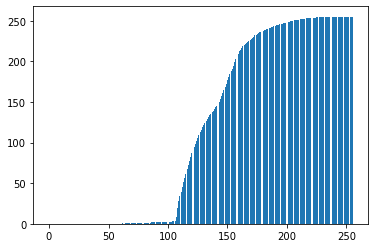

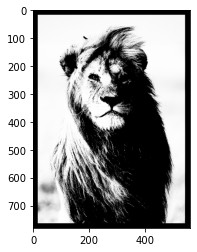

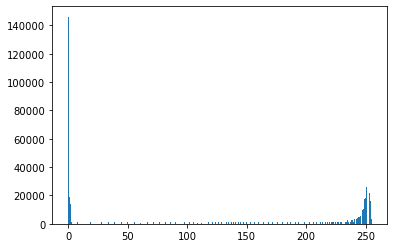

In [16]:
def especificar():
    histo = {}
    for i in range(256): 
        histo[i] = 0

    # Criando o histograma
    for i in range(row2):
        for j in range(col2):
            histo[img2[i, j, 1]] = histo[img2[i, j, 1]] + 1
            
    totPixels = img2.shape[0]*img2.shape[1]
    histoProb = {}
    
    # Criando o histograma probabilistico
    for i in range(0, 256):
        histoProb[i] = histo[i] / totPixels
        
    plt.bar(histoProb.keys(), histoProb.values())
    plt.show()
    
    # Probabilidade acumulativa
    acc = {}
    sumProb = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sumProb += histoProb[i-1]
        acc[i] = 255*(histoProb[i] + sumProb)
        
    plt.bar(acc.keys(), acc.values())
    plt.show()
    
    # Especificando
    for i in range(row):
        for j in range(col):
            img[i, j, 0] = acc[img[i, j, 0]]
            img[i, j, 1] = acc[img[i, j, 1]]
            img[i, j, 2] = acc[img[i, j, 2]]
    plt.imshow(img)
    plt.show()
    gerar_histograma()
especificar()